<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: HDB Resale Predictor
## Part 2 - Modelling, Conclusion and Recommendations

---
## Contents
---

### [Part 1](part_1.ipynb)
1. Introduction
2. Problem Statement
3. Data Import and Cleaning
4. Exploratory Data Analysis
5. Feature Selection and Engineering

### Part 2
6. [Pre-processing](#6.-Pre-processing)
7. [Modelling](#7.-Modelling)
8. [Refine Model](#8.-Refine-Model)
9. [Conclusion](#9.-Conclusion)
10. [Recommendations](#10.-Recommendations)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_selection import f_classif
from sklearn.neighbors import KNeighborsRegressor

### Importing Data

In [2]:
clean = pd.read_csv("../data/train_cleaned.csv", low_memory=False)
clean.head()

,id,tranc_yearmonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05-01,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07-01,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07-01,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04-01,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12-01,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


---
## 6. Pre-processing
---

In [3]:
# Coordinates of the Singapore River, a reference point for the central of Singapore
town_lat = 1.290160
town_long = 103.852000

# Create a new column for town_proxy
clean['town_proxy'] = ((clean['latitude'] - town_lat) ** 2) + ((clean['longitude'] - town_long) ** 2)

In [4]:
# Exporting final dataset
clean.to_csv('../data/train_cleaned2.csv', index=False)

> <font size = 3 color = "crimson"> Would be good to explain why you used the Singapore River here. What about the central area makes it a good proxy?</font>

### 6a. Assemble predictor variables (X) and target (y)

In [5]:
# Create a dataframe, X, containing all the features selected

X = clean[['id','floor_area_sqm',
        'tranc_year',
        'mid_storey',
        'hdb_age',
        'max_floor_lvl',
        'year_completed',
        'total_dwelling_units',
        '4room_sold',
        '5room_sold',
        'exec_sold',
        'latitude',
        'longitude',
        'mall_nearest_distance',
        'mall_within_2km',
        'hawker_within_2km',
        'hawker_nearest_distance',
        'hawker_food_stalls',
        'hawker_market_stalls',
        'mrt_nearest_distance',
        'bus_stop_nearest_distance',
        'pri_sch_nearest_distance',
        'vacancy',
        'sec_sch_nearest_dist',
        'cutoff_point',
        'town_proxy']]

In [6]:
y = clean['resale_price']

### 6b. Train-test-split

In [7]:
# Train/test split data.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

[Back to Contents](#Contents)

---
## 7. Modelling
---

### 7a. Cross-validation

In [8]:
# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.833657801157361
0.8322529401286414


In [10]:
cross_val_score(lr,X_test,y_test).mean()

0.8320191182566898

In [11]:
print("Cross-validation scores: {}".format(cross_val_score(lr, X_train, y_train, cv=5)))
print("Baseline train score (mean): {}".format((cross_val_score(lr, X_train, y_train, cv=5)).mean()))
print("Baseline test score (mean): {}".format((cross_val_score(lr, X_test, y_test, cv=5)).mean()))

Cross-validation scores: [0.82991912 0.83419811 0.83440242 0.83692832 0.83238096]
Baseline train score (mean): 0.8335657884083828
Baseline test score (mean): 0.8320191182566898


### 7b. Linear Regression (LR)

In [12]:
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

In [13]:
print("LR train score: {}".format(lr.score(X_train, y_train)))
print("LR test score: {}".format(lr.score(X_test, y_test)))
print("LR train RMSE: {}".format(metrics.mean_squared_error(lr_train_pred, y_train, squared=False)))
print("LR test RMSE: {}".format(metrics.mean_squared_error(lr_test_pred, y_test, squared=False)))

LR train score: 0.833657801157361
LR test score: 0.8322529401286414
LR train RMSE: 58522.56652102823
LR test RMSE: 58464.89675743961


In [14]:
# Check coefficients
lr.coef_

array([-7.14571691e-03,  3.93900416e+03, -5.56677911e+03,  3.53644706e+03,
       -3.32343657e+03,  4.21115771e+03,  2.55336201e+02, -1.66881832e+02,
        6.60009711e+00, -8.16297746e+01,  3.07097724e+02, -3.02067399e+05,
        7.32180189e+04, -1.97540560e+01, -2.41216698e+03,  4.18206026e+03,
       -9.86091428e+00,  2.64802423e+01,  1.30939233e+02, -5.15057062e+01,
        4.98478433e+00,  1.50027613e+01, -1.73682534e+02,  1.26636407e+01,
        7.38272429e+01, -4.94926268e+06])

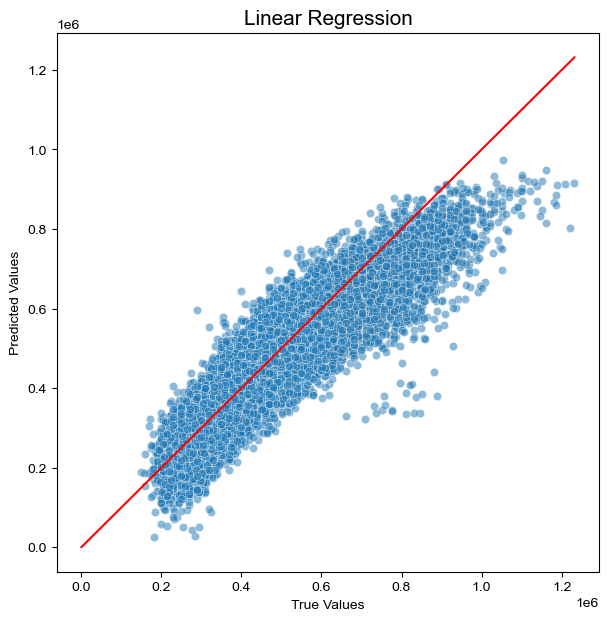

In [15]:
# Scatter plot showing the relationship between observed and predicted values.
plt.figure(figsize = (7, 7))

sns.scatterplot(x=y_test, y=lr_test_pred,alpha=0.5)
sns.set_theme()

# Line showing perfect predictions
plt.plot([11.5, max(max(y_test),max(lr_test_pred))],
         [12, max(max(y_test),max(lr_test_pred))],
         linestyle = '-',color='red')

plt.title('Linear Regression', fontsize = 15)
plt.xlabel('True Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

### 7c. Regularization

#### i. Ridge

In [16]:
ridgeRegressor = Ridge()
ridgeRegressor.fit(X_train, y_train)
ridge_train_pred = ridgeRegressor.predict(X_train)
ridge_test_pred = ridgeRegressor.predict(X_test)

In [17]:
print("Ridge train score: {}".format(r2_score(ridge_train_pred, y_train)))
print("Ridge test score: {}".format(r2_score(ridge_test_pred, y_test)))
print("Ridge train RMSE: {}".format(metrics.mean_squared_error(ridge_train_pred, y_train, squared=False)))
print("Ridge test RMSE: {}".format(metrics.mean_squared_error(ridge_test_pred, y_test, squared=False)))

Ridge train score: 0.7949833960783249
Ridge test score: 0.7911173148763042
Ridge train RMSE: 58962.35380398064
Ridge test RMSE: 58993.316964991216


In [18]:
# Coefficients
ridgeRegressor.coef_

array([-1.11925785e-02,  3.88992036e+03, -5.45163333e+03,  3.54021216e+03,
       -3.03497501e+03,  4.52577641e+03,  4.18531516e+02, -1.80175630e+02,
        1.15573330e+01, -9.14288280e+01,  3.26920376e+02, -4.62979209e+05,
        1.48754886e+05, -1.86285219e+01, -2.31406635e+03,  5.76279385e+03,
       -9.64073803e+00, -4.98872685e+01,  1.08626760e+02, -4.96304239e+01,
        6.61825609e+00,  1.46647136e+01, -1.30110666e+02,  1.28166882e+01,
        1.28306097e+02, -2.92276271e+06])

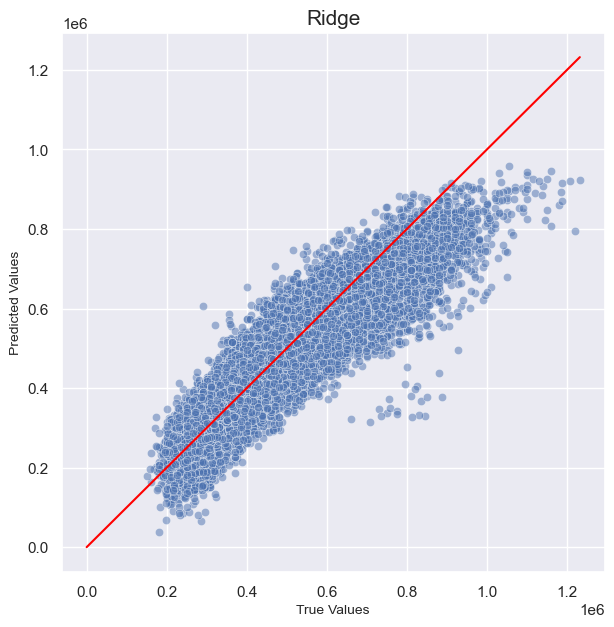

In [19]:
# Scatter plot showing the relationship between observed and predicted values.
plt.figure(figsize = (7, 7))

sns.scatterplot(x=y_test, y=ridge_test_pred,alpha=0.5)
sns.set_theme()

# Line showing perfect predictions
plt.plot([11.5, max(max(y_test),max(ridge_test_pred))],
         [12, max(max(y_test),max(ridge_test_pred))],
         linestyle = '-',color='red')

plt.title('Ridge', fontsize = 15)
plt.xlabel('True Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

#### ii. Lasso

In [20]:
lassoRegressor = Lasso()
lassoRegressor.fit(X_train, y_train)
lasso_train_pred = lassoRegressor.predict(X_train)
lasso_test_pred = lassoRegressor.predict(X_test)

In [21]:
lasso_pred = lassoRegressor.predict(X_train)
print("Lasso train score: {}".format(r2_score(lasso_train_pred, y_train)))
print("Lasso test score: {}".format(r2_score(lasso_test_pred, y_test)))
print("Lasso train RMSE: {}".format(metrics.mean_squared_error(lasso_train_pred, y_train, squared=False)))
print("Lasso test RMSE: {}".format(metrics.mean_squared_error(lasso_test_pred, y_test, squared=False)))

Lasso train score: 0.8003395792556516
Lasso test score: 0.7971451880797489
Lasso train RMSE: 58523.10477338271
Lasso test RMSE: 58468.687733539446


In [22]:
# Coefficients
lassoRegressor.coef_

array([-7.25784500e-03,  3.93735388e+03, -5.56241703e+03,  3.53650964e+03,
       -3.31082309e+03,  4.22313855e+03,  2.62970968e+02, -1.67360580e+02,
        6.73869990e+00, -8.20754062e+01,  3.07665140e+02, -3.06594206e+05,
        7.56098087e+04, -1.96979689e+01, -2.40676546e+03,  4.24286074e+03,
       -9.84887776e+00,  2.38599591e+01,  1.30208102e+02, -5.14363239e+01,
        5.05636070e+00,  1.49982017e+01, -1.72148118e+02,  1.26827976e+01,
        7.58105029e+01, -4.87928885e+06])

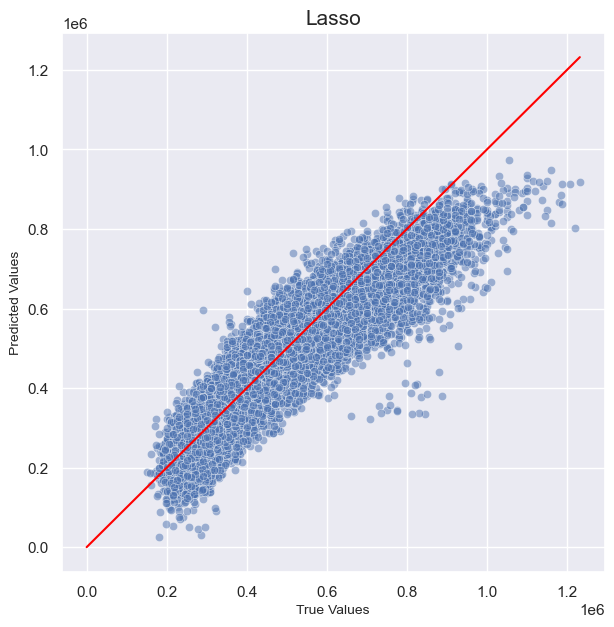

In [23]:
# Scatter plot showing the relationship between observed and predicted values.
plt.figure(figsize = (7, 7))

sns.scatterplot(x=y_test, y=lasso_test_pred,alpha=0.5)
sns.set_theme()

# Line showing perfect predictions
plt.plot([11.5, max(max(y_test),max(lasso_test_pred))],
         [12, max(max(y_test),max(lasso_test_pred))],
         linestyle = '-',color='red')

plt.title('Lasso', fontsize = 15)
plt.xlabel('True Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10);

**Summary**

| |R2 (train)|R2 (test)|RMSE (train)|RMSE (test)|
|---|---|---|---|---|
|Linear regression|0.834|0.832|58,523|58,464|
|Ridge|0.795|0.791|58,963|58,992|
|Lasso|0.800|0.797|58,523|58,468|

**Linear regression** is the chosen model as it has:
* the highest R2 values on both train and test data
* the lowest RMSE values on both train and test data

[Back to Contents](#Contents)

---
## 8. Refine Model
---

### 8a. KNN Regressor model

In [24]:
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

knn_regressor.score(X_train, y_train)
knn_train_pred = knn_regressor.predict(X_train)
knn_test_pred = knn_regressor.predict(X_test)

print("KNN regressor train score: {}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {}".format(knn_regressor.score(X_test, y_test)))
print("KNN regressor train RMSE: {}".format(metrics.mean_squared_error(knn_train_pred, y_train, squared=False)))
print("KNN regressor test RMSE: {}".format(metrics.mean_squared_error(knn_test_pred, y_test, squared=False)))

KNN regressor train score: 0.9662201753436173
KNN regressor test score: 0.922220798317842
KNN regressor train RMSE: 26372.472029990437
KNN regressor test RMSE: 39810.668403858115


| |R2 (train)|R2 (test)|RMSE (train)|RMSE (test)|
|---|---|---|---|---|
|Linear regression|0.834|0.832|58,523|58,464|
|KNN regression|0.965|0.920|26,826|40,479|
|% change|+15.7|+10.6|-54.2|-30.8|

* After tuning our model with KNN regression, the **R2 values** have **improved significantly by 15.7% and 10.6%** on the train and test data respectively.
* The **RMSE values** have also **decreased significantly by 54.2% and 30.8%** on the train and test data respectively.
* This shows that the **relationship between the features and resale price is not exactly linear**, thus, a KNN regression model should be used to predict resale prices more accurately.
* Though there is a ~14k difference in the RMSE values, the **RMSE values are within range**. To reduce the difference and strengthen the reliability of model, a more in depth study using the KNN regression should be carried out to fine tune the model.


### 8b. SelectKBest
- 30 features appears to be the optimal hyperparameter as the R2 values fall when k<25 or k>25.
- The model is run again with the top 25 features and the R2 value went up by 0.005.

> <font size = 3 color = "crimson"> Would be good to combine all your models into one table and identify which one is the baseline.</font>

In [25]:
X = pd.concat([X, clean['town_proxy']], axis=1)
X.head()

,id,floor_area_sqm,tranc_year,mid_storey,hdb_age,max_floor_lvl,year_completed,total_dwelling_units,4room_sold,5room_sold,...,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,sec_sch_nearest_dist,cutoff_point,town_proxy,town_proxy
0,88471,90.0,2016,11,15,25,2005,142,96,46,...,84,60,330.083069,29.427395,1138.633422,78,1138.633422,224,0.001016,0.001016
1,122598,130.0,2012,8,34,9,1987,112,56,56,...,80,77,903.659703,58.207761,415.607357,45,447.894399,232,0.003137,0.003137
2,170897,144.0,2013,14,24,16,1996,90,0,30,...,84,95,1334.251197,214.747860,498.849039,39,180.074558,188,0.011250,0.011250
3,86070,103.0,2012,3,29,11,1990,75,68,7,...,32,86,907.453484,43.396521,389.515528,20,389.515528,253,0.004678,0.004678
4,153632,83.0,2017,2,34,4,1987,48,30,18,...,45,0,412.343032,129.422752,401.200584,74,312.025435,208,0.015793,0.015793


In [26]:
# Create a SelectKBest instance that shows the top 30 features
selector = SelectKBest(score_func=f_classif, k=27)

# Fit SelectKBest to data
X2 = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support()
selected_feature_indices

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
# Get the column names (feature names) of the selected features
selected_feature_names = np.array(X.columns)[selected_feature_indices]
print("Top 30 features selected: {}".format(selected_feature_names))

Top 30 features selected: ['id' 'floor_area_sqm' 'tranc_year' 'mid_storey' 'hdb_age' 'max_floor_lvl'
 'year_completed' 'total_dwelling_units' '4room_sold' '5room_sold'
 'exec_sold' 'latitude' 'longitude' 'mall_nearest_distance'
 'mall_within_2km' 'hawker_within_2km' 'hawker_nearest_distance'
 'hawker_food_stalls' 'hawker_market_stalls' 'mrt_nearest_distance'
 'bus_stop_nearest_distance' 'pri_sch_nearest_distance' 'vacancy'
 'sec_sch_nearest_dist' 'cutoff_point' 'town_proxy' 'town_proxy']


[Back to Contents](#Contents)

> <font size = 3 color = "crimson"> Would be good to explain what you're doing here and why.</font>

---
## 9. Conclusion
---

**Predictive Model Accuracy**
- The Linear Regression Model demonstrates the potential to estimate HDB resale prices with reasonable accuracy. 
- However, it can be improved with more sophisticated machine learning techniques like KNN Regressor Model.

**Key Predictors** <br>
According to *SelectKBest*, the top 5 factors to focus on when considering hdb resale prices are:
1. Floor area
2. The HDB flat's age
3. Height of the hdb flat
4. Year completed
5. How many 5 room flats are sold in that flat


**Model Performance**
- The model achieved [mention the metrics, e.g., R-squared (R2)] as indicators of its performance. Investors should be aware of these metrics to gauge the model's reliability.

**Limitations**
- It's important to acknowledge the limitations of the model, such as its reliance on historical data and the assumption of linear relationships. Additionally, real-world property prices are influenced by a wide range of factors beyond those considered in this model.

---
## 10. Recommendations
---

**Data Enrichment**
- To enhance the accuracy of price predictions, we can consider including non-numerical features like 'town', 'street_name', and 'planning_area' which are qualitative indicators of location.

**Diversification**
- Emphasize the importance of diversifying investment portfolios. Investors should consider spreading their investments across different types of properties, locations, and asset classes to mitigate risks associated with fluctuations in the HDB resale market.

**Policy Compliance**
- From the second half of 2024, HDB towns will no longer be classified as mature or non-mature. Instead, individual BTO projects within each town will now be classified as Standard, Prime, or Plus flats, depending on their locational attributes. Further study can be done to assess how these new classifications would affect the HDB resale market.

[Back to Contents](#Contents)

> <font size = 3 color = "crimson"> Your conclusion should address your problem statement by giving recommendations that improve/resolve the situation described in the problem statement. For example, as a real estate consultancy, based on your modelling results, how would you advise your clients to raise the prices of their homes? etc. Recommendations != future work for yourself; that is a separate matter.</font>